In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
import missingno as msn

In [3]:
df = pd.read_csv('cardekho_updated.csv')

In [4]:
backup = pd.read_csv('cardekho_updated.csv')

# Data Cleaning 

In [5]:
df.head()

,full_name,selling_price,new_price,year,seller_type,km_driven,owner_type,fuel_type,transmission_type,mileage,engine,max_power,seats
0,Maruti Alto Std,1.2 Lakh*,NaN,2012,Individual,"1,20,000 kms",First Owner,Petrol,Manual,Mileage19.7 kmpl,Engine796 CC,Max Power46.3 bhp,Seats5
1,Hyundai Grand i10 Asta,5.5 Lakh*,New Car (On-Road Price) : Rs.7.11-7.48 Lakh*,2016,Individual,"20,000 kms",First Owner,Petrol,Manual,Mileage18.9 kmpl,Engine1197 CC,Max Power82 bhp,Seats5
2,Hyundai i20 Asta,2.15 Lakh*,NaN,2010,Individual,"60,000 kms",First Owner,Petrol,Manual,Mileage17.0 kmpl,Engine1197 CC,Max Power80 bhp,Seats5
3,Maruti Alto K10 2010-2014 VXI,2.26 Lakh*,NaN,2012,Individual,"37,000 kms",First Owner,Petrol,Manual,Mileage20.92 kmpl,Engine998 CC,Max Power67.1 bhp,Seats5
4,Ford Ecosport 2015-2021 1.5 TDCi Titanium BSIV,5.7 Lakh*,New Car (On-Road Price) : Rs.10.14-13.79 Lakh*,2015,Dealer,"30,000 kms",First Owner,Diesel,Manual,Mileage22.77 kmpl,Engine1498 CC,Max Power98.59 bhp,Seats5


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19974 entries, 0 to 19973
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   full_name          19974 non-null  object
 1   selling_price      19974 non-null  object
 2   new_price          9564 non-null   object
 3   year               19974 non-null  int64 
 4   seller_type        19974 non-null  object
 5   km_driven          19974 non-null  object
 6   owner_type         19974 non-null  object
 7   fuel_type          19974 non-null  object
 8   transmission_type  19974 non-null  object
 9   mileage            19814 non-null  object
 10  engine             19864 non-null  object
 11  max_power          19637 non-null  object
 12  seats              19887 non-null  object
dtypes: int64(1), object(12)
memory usage: 2.0+ MB


<AxesSubplot:>

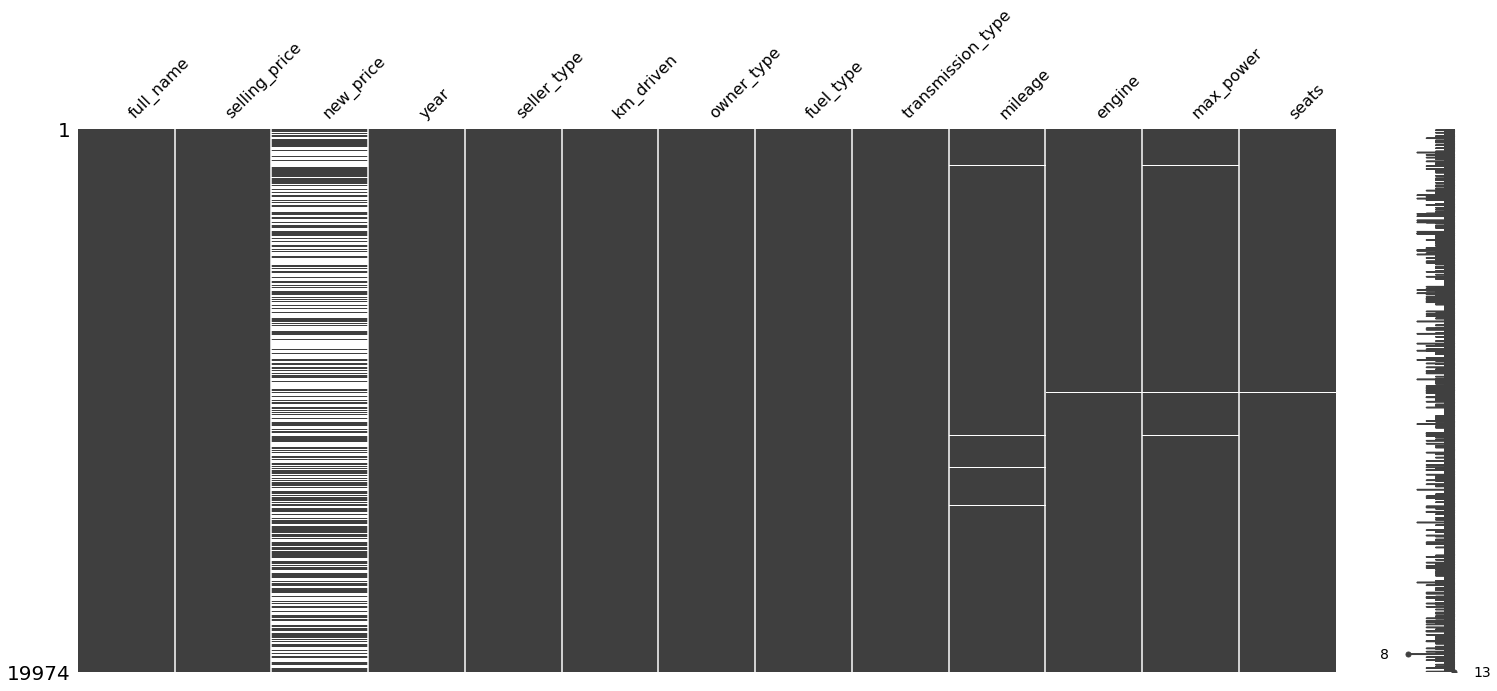

In [7]:
msn.matrix(df)

We can see that the new_price column has the most number of missing values 

In [8]:
df.columns

Index(['full_name', 'selling_price', 'new_price', 'year', 'seller_type',
       'km_driven', 'owner_type', 'fuel_type', 'transmission_type', 'mileage',
       'engine', 'max_power', 'seats'],
      dtype='object')

In [9]:
np.size(df['full_name'].unique())

3321

In [10]:
df['full_name'].value_counts()

Maruti Swift Dzire VDI                          210
Maruti Alto 800 LXI                             189
Maruti Wagon R VXI                              163
Maruti Swift VDI                                150
Maruti Alto K10 VXI                             121
                                               ... 
Toyota Etios Cross 1.5L V                         1
Ford Endeavour Hurricane Limited Edition          1
Volvo S60 D4 SUMMUM                               1
Chevrolet Spark 1.0 LT Option Pack w/ Airbag      1
BMW 3 Series 316i                                 1
Name: full_name, Length: 3321, dtype: int64

_

We create a new DataFrame that stores the total quantity if each car and the number of cars that have a non-NULL new price value

In [11]:
df2 = pd.DataFrame( index=df['full_name'].value_counts().index)
df2['Total'] = df['full_name'].value_counts()
df2 = df2.join(df['new_price'].groupby(df['full_name']).count().sort_values())
df2.rename({'new_price':'price not NULL'}, axis=1, inplace=True)
df2['diff']  = df2['Total']-df2['price not NULL']

In [12]:
df2.sort_values(by = 'price not NULL', ascending=False)

,Total,price not NULL,diff
Maruti Alto 800 LXI,189,166,23
Maruti Wagon R VXI,163,135,28
Maruti Swift Dzire VXI,104,92,12
Maruti Swift VXI,100,87,13
Hyundai Grand i10 Sportz,94,79,15
...,...,...,...
Toyota Platinum Etios 1.5 V,3,0,3
Ford Fiesta 1.4 Duratec EXI,3,0,3
Maruti Ritz VXi (ABS) BS IV,3,0,3
Honda Jazz VX Diesel,3,0,3


A lot of models have large number of units available but the new_price is NULL for all of them. What to do with these NULL values ..... 

## Cleaning unnecessary bullshit with regular expressions

In [13]:
import re

In [14]:
df.head()

,full_name,selling_price,new_price,year,seller_type,km_driven,owner_type,fuel_type,transmission_type,mileage,engine,max_power,seats
0,Maruti Alto Std,1.2 Lakh*,NaN,2012,Individual,"1,20,000 kms",First Owner,Petrol,Manual,Mileage19.7 kmpl,Engine796 CC,Max Power46.3 bhp,Seats5
1,Hyundai Grand i10 Asta,5.5 Lakh*,New Car (On-Road Price) : Rs.7.11-7.48 Lakh*,2016,Individual,"20,000 kms",First Owner,Petrol,Manual,Mileage18.9 kmpl,Engine1197 CC,Max Power82 bhp,Seats5
2,Hyundai i20 Asta,2.15 Lakh*,NaN,2010,Individual,"60,000 kms",First Owner,Petrol,Manual,Mileage17.0 kmpl,Engine1197 CC,Max Power80 bhp,Seats5
3,Maruti Alto K10 2010-2014 VXI,2.26 Lakh*,NaN,2012,Individual,"37,000 kms",First Owner,Petrol,Manual,Mileage20.92 kmpl,Engine998 CC,Max Power67.1 bhp,Seats5
4,Ford Ecosport 2015-2021 1.5 TDCi Titanium BSIV,5.7 Lakh*,New Car (On-Road Price) : Rs.10.14-13.79 Lakh*,2015,Dealer,"30,000 kms",First Owner,Diesel,Manual,Mileage22.77 kmpl,Engine1498 CC,Max Power98.59 bhp,Seats5


In [15]:
df['selling_price'] = df['selling_price'].replace(to_replace=r'[A-Za-z\*]*', value = '', regex=True)
df['km_driven'] = df['km_driven'].replace(to_replace=r'[^\d]+', value = '', regex=True)
df['mileage'] = df['mileage'].replace(to_replace=r'[^\d\.]+', value = '', regex=True)
df['engine'] = df['engine'].replace(to_replace=r'[^\d]+', value = '', regex=True)
df['max_power'] = df['max_power'].replace(to_replace=r'[^\d\.]+', value = '', regex=True)
df['seats'] = df['seats'].replace(to_replace=r'[^\d]+', value = '', regex=True)

In [16]:
df.head()

,full_name,selling_price,new_price,year,seller_type,km_driven,owner_type,fuel_type,transmission_type,mileage,engine,max_power,seats
0,Maruti Alto Std,1.2,NaN,2012,Individual,120000,First Owner,Petrol,Manual,19.7,796,46.3,5
1,Hyundai Grand i10 Asta,5.5,New Car (On-Road Price) : Rs.7.11-7.48 Lakh*,2016,Individual,20000,First Owner,Petrol,Manual,18.9,1197,82,5
2,Hyundai i20 Asta,2.15,NaN,2010,Individual,60000,First Owner,Petrol,Manual,17.0,1197,80,5
3,Maruti Alto K10 2010-2014 VXI,2.26,NaN,2012,Individual,37000,First Owner,Petrol,Manual,20.92,998,67.1,5
4,Ford Ecosport 2015-2021 1.5 TDCi Titanium BSIV,5.7,New Car (On-Road Price) : Rs.10.14-13.79 Lakh*,2015,Dealer,30000,First Owner,Diesel,Manual,22.77,1498,98.59,5


In [17]:
df['p_min'] = None
df['p_max'] = None

In [18]:
for i in range(np.size(df['new_price'])):
    if(type(df.loc[i,'new_price'])==str):
        df.loc[i,'p_min'] = re.findall(r'\d+\.*\d*\-?', df.loc[i,'new_price'])[0]
        df.loc[i,'p_min'] = float(re.findall(r'[^\-]+', df.loc[i,'p_min'])[0])
        if(re.findall(r'\-\d+\.*\d*', df.loc[i,'new_price'])):
            df.loc[i,'p_max'] = re.findall(r'\-\d+\.*\d*', df.loc[i,'new_price'])[0]
            df.loc[i,'p_max'] = float(re.findall(r'[^\-]+', df.loc[i,'p_max'])[0])

In [19]:
df['p_min'].head()

0     None
1     7.11
2     None
3     None
4    10.14
Name: p_min, dtype: object

In [20]:
df['p_max'].head()

0     None
1     7.48
2     None
3     None
4    13.79
Name: p_max, dtype: object

In [21]:
df['new_price'] = (df['p_max']+df['p_min'])/2

In [22]:
df.drop(labels=['p_max','p_min'], axis=1, inplace=True)

In [23]:
df.head()

,full_name,selling_price,new_price,year,seller_type,km_driven,owner_type,fuel_type,transmission_type,mileage,engine,max_power,seats
0,Maruti Alto Std,1.2,NaN,2012,Individual,120000,First Owner,Petrol,Manual,19.7,796,46.3,5
1,Hyundai Grand i10 Asta,5.5,7.295,2016,Individual,20000,First Owner,Petrol,Manual,18.9,1197,82,5
2,Hyundai i20 Asta,2.15,NaN,2010,Individual,60000,First Owner,Petrol,Manual,17.0,1197,80,5
3,Maruti Alto K10 2010-2014 VXI,2.26,NaN,2012,Individual,37000,First Owner,Petrol,Manual,20.92,998,67.1,5
4,Ford Ecosport 2015-2021 1.5 TDCi Titanium BSIV,5.7,11.965,2015,Dealer,30000,First Owner,Diesel,Manual,22.77,1498,98.59,5


In [24]:
df['new_price'].isna().count()

19974

In [25]:
df['new_price'].count()

9278

# Study Groupby function

In [35]:
newp = df.groupby('full_name')

In [47]:
newp = newp.count().sort_values(by='new_price', ascending=False)

In [48]:
newp.head()

,selling_price,new_price,year,seller_type,km_driven,owner_type,fuel_type,transmission_type,mileage,engine,max_power,seats
full_name,,,,,,,,,,,,
Maruti Alto 800 LXI,189,166,189,189,189,189,189,189,189,189,189,189
Maruti Wagon R VXI,163,135,163,163,163,163,163,163,163,163,163,163
Maruti Swift Dzire VXI,104,92,104,104,104,104,104,104,104,104,104,104
Maruti Swift VXI,100,87,100,100,100,100,100,100,100,100,100,100
Hyundai Grand i10 Sportz,94,79,94,94,94,94,94,94,94,94,94,94


In [ ]:
for i in newp.index:
    if(newp.loc[i,'new_price']>0):
        

# Study Groupby and Transform